## D

In [26]:
import numpy as np



def get_step(f, grad_f, x, d, alpha, beta, s, A, b):
    t=s
    while (f(x+t*d)>=f(x)+alpha*t*grad_f(x).dot(d)) or not (A@(x)<=b).all():
        t=beta*t
    return t






def newton_armijo(f, grad_f, hess_f, x0, s, alpha, beta, eps, A, b):
    x=x0
    xs_vec=[x0]
    fs_vec=[f(x0)]
    grad=grad_f(x)
    hess=hess_f(x)
    while np.linalg.norm(grad_f(x))>eps:
        d= np.linalg.solve(hess, -grad)
        t=get_step(f, grad_f, x, d, alpha, beta, s, A, b)
        x=x+t*d
        grad=grad_f(x)
        hess=hess_f(x)
        xs_vec.append(x)
        fs_vec.append(f(x))
    return np.array(xs_vec), np.array(fs_vec)







In [27]:
def analytic_center(A, b,x0):
    s=2
    alpha=0.25
    beta=0.5
    eps=1e-6
    m,n=A.shape
    if (A@x0<=b).all():
        f= lambda x: -1*sum([np.log(b[i]-A[i].dot(x)) for i in range(m)])
        grad_f= lambda x: sum([A[i]/(b[i]-A[i].dot(x)) for i in range(m)])  
        hess_f= lambda x: np.matmul(A.T, np.diag([1/(b[i]-A[i].dot(x))**2 for i in range(m)]).dot(A))
        xs_vec, fs_vec = newton_armijo(f, grad_f, hess_f, x0, s, alpha, beta, eps, A, b)
        return xs_vec.T , fs_vec
    print("error")
    return


[[-1.99000000e+00 -1.97016392e+00 -1.91196587e+00 -1.74904608e+00
  -1.35611560e+00 -6.74890855e-01 -6.21956126e-01 -5.64456480e-01
  -5.66948690e-01 -5.66954874e-01]
 [ 0.00000000e+00 -7.31019175e-05 -8.79561938e-04 -8.60094462e-03
  -7.65469047e-02 -4.75140868e-01 -7.81419400e-01 -8.45397206e-01
  -8.45082828e-01 -8.45073559e-01]]


C:\Users\Yuval Margolin\AppData\Local\Temp\ipykernel_4624\2393795605.py:21: RuntimeWarning: divide by zero encountered in log
  f =lambda x,y : -1*sum([np.log(b[i]-A[i][0]*x-A[i][1]*y) for i in range(m)])
C:\Users\Yuval Margolin\AppData\Local\Temp\ipykernel_4624\2393795605.py:21: RuntimeWarning: invalid value encountered in log
  f =lambda x,y : -1*sum([np.log(b[i]-A[i][0]*x-A[i][1]*y) for i in range(m)])


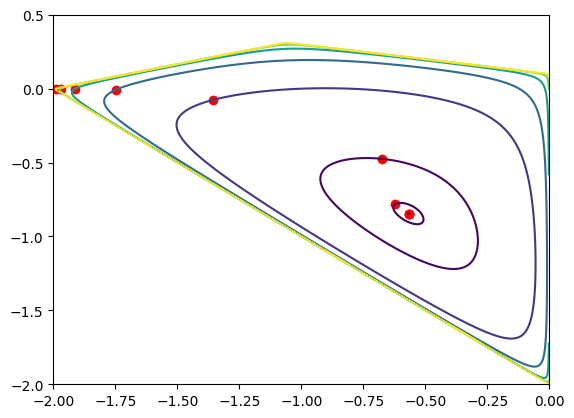

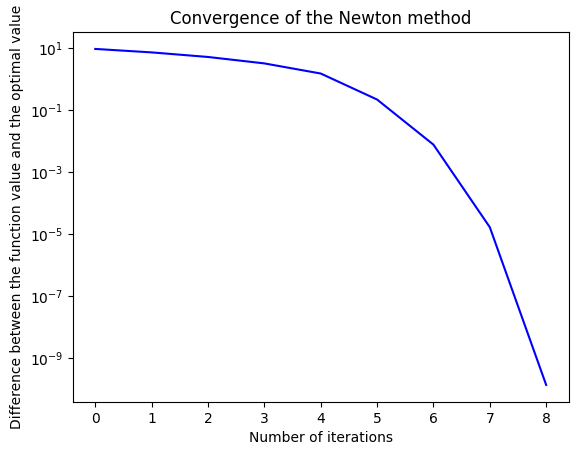

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
m,n=A.shape
x0= np.array([-1.99,0])
A = np.array([[2, 10], [1, 0], [-1, 3], [-1, -1]])
b = np.array([1, 0, 2, 2])
xs, fs = analytic_center(A, b, x0)
print(xs)
x_cord = []
y_cord = []
x_Q = np.linspace(-2, 0, 1000)
y_Q = np.linspace(-2, 0.5, 1000)
points = np.array([[-2, 0],[0,-2],[0, 0.1],[-17/16, 5/16]])
fig = patches.Polygon(points, edgecolor='r', facecolor='none')
fig.set_alpha(0.08)
plt.scatter(xs[0], xs[1], color='r')
ax = plt.gca()
ax.add_patch(fig)
xx, yy = np.meshgrid(x_Q, y_Q)
f =lambda x,y : -1*sum([np.log(b[i]-A[i][0]*x-A[i][1]*y) for i in range(m)])

z = np.array(f(xx,yy))
z[np.isnan(z)] = 10**10
z = z.reshape(xx.T.shape)
fs = fs.tolist()
fs.reverse()
plt.contour(xx, yy, z, levels=fs)
plt.show()
fs.reverse()
difflist = [fs[i]-fs[-1] for i in range(len(fs)-1)]
plt.semilogy(difflist, color = 'b')
plt.title('Convergence of the Newton method')
plt.xlabel('Number of iterations')
plt.ylabel('Difference between the function value and the optimal value')
plt.show()




In [29]:
s=2
alpha=0.25
beta=0.5

xs,fs = analytic_center(A, b,x0)
